In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('BankChurners.csv')

In [4]:
print(df.shape)

df.head()

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
(df.isnull().sum()/len(df))*100

CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

In [7]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [8]:
{i:len(df[i].unique()) for i in df.select_dtypes('object').columns}

{'Attrition_Flag': 2,
 'Gender': 2,
 'Education_Level': 7,
 'Marital_Status': 4,
 'Income_Category': 6,
 'Card_Category': 4}

In [9]:
{j: list(df[j].unique())  for j in df.select_dtypes('object').columns}

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

In [10]:
### We have unknown values, we need to fix this

In [11]:
def unknown_values(data, col):
    data=data.copy()
    
    y=data.loc[data[col]=='Unknown']
    return y

In [12]:
unknown_values(df, 'Education_Level')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.999880
11,710821833,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174,0.000198,0.999800
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230,0.000063,0.999940
17,753327333,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,4,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095,0.000150,0.999850
23,811604133,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626,0.000207,0.999790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,712296408,Existing Customer,36,F,3,Unknown,Married,$40K - $60K,Blue,22,5,3,3,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175,0.000345,0.999650
10094,716123283,Existing Customer,59,M,1,Unknown,Single,$60K - $80K,Blue,48,3,1,2,7288.0,0,7288.0,0.640,14873,120,0.714,0.000,0.000057,0.999940
10095,789023508,Existing Customer,46,M,3,Unknown,Married,$80K - $120K,Blue,33,4,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032,0.000106,0.999890
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096,0.998130,0.001874


In [13]:
unknown_values(df, 'Education_Level')['Income_Category'].value_counts()

Less than $40K    556
$40K - $60K       269
$80K - $120K      219
$60K - $80K       210
Unknown           145
$120K +           120
Name: Income_Category, dtype: int64

In [14]:
## Attrition_Flag and Gender have just two unique values so they can be Binary Encoded.

## The unique values in the Education_Level and Income_Category columns have some sort of order so they can be Ordinal Encoded.

### The unique values in Marital_Status and Card_Category have no particular order so they can be One-hot Encoded.

In [15]:
pd.get_dummies(df['Marital_Status'], prefix='MS')

,MS_Divorced,MS_Married,MS_Single,MS_Unknown
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
10122,0,0,1,0
10123,1,0,0,0
10124,0,1,0,0
10125,0,0,0,1


In [16]:
### Encoding of values

def binary_encode(data, column, yes):
    data = data.copy()
    data[column]=data[column].apply(lambda x: 1 if x==yes else 0)
    return data   
    
def ordinal_encode(data, column, ordering):
    data = data.copy()
    data[column]=data[column].apply(lambda x: ordering.index(x))
    return data

def onehot_encode(data, column, prefix):
    data = data.copy()
    dummies=pd.get_dummies(data[column],  prefix=prefix)
    data=pd.concat([data, dummies], axis=1)
    data=data.drop(column, axis=1)
    return data

In [17]:
### Preprocessing


def preprocess_inputs(data):
    data=data.copy()
    
    ## Drop the last two columns
    data=data.drop(data.columns[-2:], axis=1)
    
    ## Drop CLIENTNUM column
    data=data.drop(columns=['CLIENTNUM'])
    
    ## Fix the Unknown values
    data=data.replace('Unknown', np.NaN)
    
    ## Fill ordinal missinng values with mode (Education, Income columns)
    data['Education_Level']=data['Education_Level'].fillna('Graduate')
    data['Income_Category']=data['Income_Category'].fillna('Less than $40K')
    
    ## Encode the Binary columns
    data=binary_encode(data, 'Attrition_Flag', 'Attrited Customer')
    data=binary_encode(data, 'Gender', 'M')
    
    ## Encode the Ordinal columns
    education_order=['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate']
    data=ordinal_encode(data, 'Education_Level', ordering=education_order)
    
    income_order=['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']
    data=ordinal_encode(data, 'Income_Category', ordering=income_order)
    
    ## Encode the Non-Ordinal or Nominal columns
    data=onehot_encode(data, 'Card_Category', prefix='Card')
    data=onehot_encode(data, 'Marital_Status', prefix='MS')
    
    
    ## Split the data into x and y variables
    y=data['Attrition_Flag'].copy()
    x=data.drop('Attrition_Flag', axis=1).copy()
    
    return x,y

In [18]:
x,y = preprocess_inputs(df)

In [19]:
x

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Blue,Card_Gold,Card_Platinum,Card_Silver,MS_Divorced,MS_Married,MS_Single
0,45,1,3,1,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0,0,0,1,0
1,49,0,5,3,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,0,0,1
2,51,1,3,3,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,0,0,0,0,1,0
3,40,0,4,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,0,0,0
4,40,1,3,0,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,3,1,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1,0,0,0,0,0,1
10123,41,1,2,3,1,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,0,0,0,1,0,0
10124,44,0,1,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,0,0,0,0,1,0
10125,30,1,2,3,1,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,0,0,0,0,0,0


In [20]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [21]:
(y.value_counts()/len(y))*100

0    83.934038
1    16.065962
Name: Attrition_Flag, dtype: float64

In [22]:
(x.isnull().sum()/len(x))*100

Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Income_Category             0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
Card_Blue                   0.0
Card_Gold                   0.0
Card_Platinum               0.0
Card_Silver                 0.0
MS_Divorced                 0.0
MS_Married                  0.0
MS_Single                   0.0
dtype: float64

In [23]:
## Let us check Feature importance

In [24]:
feature=ExtraTreesRegressor()
feature.fit(x,y)

ExtraTreesRegressor()

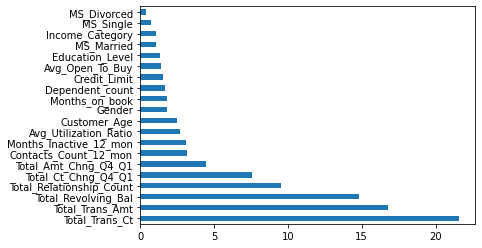

<Figure size 720x1800 with 0 Axes>

In [25]:
feature_rank=pd.Series(feature.feature_importances_, index=x.columns)*100

feature_rank.nlargest(20).plot(kind='barh')

plt.figure(figsize=(10,25))
plt.show()

In [26]:
## Model Building

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN,SMOTETomek
from collections import Counter

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=1)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((7595, 24), (2532, 24), (7595,), (2532,))

In [29]:
Counter(ytrain)

Counter({0: 6373, 1: 1222})

In [30]:
## The data is unbalanced so we will use Smoteenn or SmoteTomek technique 

In [31]:
sn=SMOTEENN()
sk=SMOTETomek

In [32]:
## Smoteenn

In [33]:
x_train, y_train=sn.fit_resample(xtrain, ytrain)

x_test, y_test=sn.fit_resample(xtest, ytest)

In [34]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10545, 24), (10545,), (3360, 24), (3360,))

In [35]:
Counter(y_train)

Counter({0: 5109, 1: 5436})

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.neural_network import MLPClassifier

In [38]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [39]:
models=[
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    RidgeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    XGBRFClassifier(),
    AdaBoostClassifier()
]

In [40]:
for model in models:
    model.fit(x_train, y_train)

C:\Users\Daniel\anaconda3\envs\pred\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Daniel\anaconda3\envs\pred\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
model_names=[
    LogisticRegression,
    SVC,
    KNeighborsClassifier,
    RidgeClassifier,
    MLPClassifier,
    RandomForestClassifier,
    XGBClassifier,
    XGBRFClassifier,
    AdaBoostClassifier
]

In [42]:
for model, model_name in zip(models, model_names):
    print(model_name, model.score(x_test, y_test)*100)

<class 'sklearn.linear_model._logistic.LogisticRegression'> 82.41071428571428
<class 'sklearn.svm._classes.SVC'> 81.63690476190476
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> 89.91071428571429
<class 'sklearn.linear_model._ridge.RidgeClassifier'> 92.4702380952381
<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> 83.86904761904762
<class 'sklearn.ensemble._forest.RandomForestClassifier'> 96.2202380952381
<class 'xgboost.sklearn.XGBClassifier'> 97.82738095238095
<class 'xgboost.sklearn.XGBRFClassifier'> 95.83333333333334
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 97.17261904761905


In [43]:
for model, model_name in zip(models, model_names):
    
    print(model_name ,accuracy_score(y_test, (model.predict(x_test)))*100)
    print(confusion_matrix(y_test, (model.predict(x_test))))
    print(classification_report(y_test, (model.predict(x_test))))

<class 'sklearn.linear_model._logistic.LogisticRegression'> 82.41071428571428
[[1344  284]
 [ 307 1425]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1628
           1       0.83      0.82      0.83      1732

    accuracy                           0.82      3360
   macro avg       0.82      0.82      0.82      3360
weighted avg       0.82      0.82      0.82      3360

<class 'sklearn.svm._classes.SVC'> 81.63690476190476
[[1302  326]
 [ 291 1441]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1628
           1       0.82      0.83      0.82      1732

    accuracy                           0.82      3360
   macro avg       0.82      0.82      0.82      3360
weighted avg       0.82      0.82      0.82      3360

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> 89.91071428571429
[[1509  119]
 [ 220 1512]]
              precision    recall  f1-score   suppo

In [56]:
## Let us try to standardize the x values and then compare the results

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
sc=MinMaxScaler()
x_=sc.fit_transform(x)

In [47]:
x_=pd.DataFrame(x_, columns=x.columns)

In [48]:
x_.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Blue,Card_Gold,Card_Platinum,Card_Silver,MS_Divorced,MS_Married,MS_Single
0,0.404255,1.0,0.6,0.2,0.50,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.489362,0.0,1.0,0.6,0.00,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.531915,1.0,0.6,0.6,0.75,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.297872,0.0,0.8,0.2,0.00,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.297872,1.0,0.6,0.0,0.50,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
train_x, test_x, train_y, test_y=train_test_split(x_,y, random_state=1)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((7595, 24), (2532, 24), (7595,), (2532,))

In [50]:
train_xn, train_yn= sn.fit_resample(train_x, train_y)

test_xn, test_yn= sn.fit_resample(test_x, test_y)

In [51]:
Counter(train_y), Counter(train_yn)

(Counter({0: 6373, 1: 1222}), Counter({0: 4585, 1: 6185}))

In [52]:
models2=[
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    RidgeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    XGBRFClassifier(),
    AdaBoostClassifier()
]

In [53]:
for model2 in models2:
    model2.fit(train_xn, train_yn)

C:\Users\Daniel\anaconda3\envs\pred\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\anaconda3\envs\pred\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
model_names2=[
    LogisticRegression,
    SVC,
    KNeighborsClassifier,
    RidgeClassifier,
    MLPClassifier,
    RandomForestClassifier,
    XGBClassifier,
    XGBRFClassifier,
    AdaBoostClassifier
]

In [55]:
for model2, name2 in zip(models2, model_names2):
    print(name2, model2.score(test_xn, test_yn)*100)

<class 'sklearn.linear_model._logistic.LogisticRegression'> 90.06810442678774
<class 'sklearn.svm._classes.SVC'> 93.1044267877412
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> 84.81838819523269
<class 'sklearn.linear_model._ridge.RidgeClassifier'> 90.32349602724177
<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> 95.00567536889898
<class 'sklearn.ensemble._forest.RandomForestClassifier'> 97.38933030646993
<class 'xgboost.sklearn.XGBClassifier'> 98.41089670828603
<class 'xgboost.sklearn.XGBRFClassifier'> 96.45289443813849
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 96.79341657207718
